In [ ]:
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
data_games = pd.read_csv('/datasets/games.csv')

In [ ]:
data_games.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
data_games.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Observaciones: COnvertir datos name, genre, plataform y rating en minusculas.
year_of Release en tipo entero.

In [ ]:
data_games.columns = data_games.columns.str.lower()
data_games['name']=data_games['name'].str.lower()
data_games['genre']=data_games['genre'].str.lower()
data_games['rating']=data_games['rating'].str.lower()
data_games['platform']=data_games['platform'].str.lower()
data_games['year_of_release'] = data_games['year_of_release'].astype('Int64')
# data_games['user_score'] = pd.to_numeric(data_games['user_score'], errors='coerce')

REvision de datos duplicados, ausentes y tipo de datos.

In [ ]:
print(data_games.duplicated().sum())
print(data_games.isna().sum())

0
name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


In [ ]:
data_games = data_games.dropna(subset=['name'])

In [ ]:
data_games.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

*SE Eliminan 2 datos filas ausentes de la columna name. ya que es un dato necesario para hacer el analisis.
*Se determino no borrar los demas datos ausente ya que pueden ser utiles para un posterior analisis y representan una gran cantidad.
*Puede que no se hallan tomado estos datos porque el juego es antiguo y no determinaron    


In [ ]:
tbd_rows = data_games[data_games['user_score'] == 'tbd']
tbd_rows.head(10) 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,zumba fitness,wii,2010,sports,3.45,2.59,0.00,0.66,NaN,tbd,e
301,namco museum: 50th anniversary,ps2,2005,misc,2.08,1.35,0.00,0.54,61.0,tbd,e10+
520,zumba fitness 2,wii,2011,sports,1.51,1.03,0.00,0.27,NaN,tbd,t
645,udraw studio,wii,2010,misc,1.65,0.57,0.00,0.20,71.0,tbd,e
657,frogger's adventures: temple of the frog,gba,<NA>,adventure,2.15,0.18,0.00,0.07,73.0,tbd,e
718,just dance kids,wii,2010,misc,1.52,0.54,0.00,0.18,NaN,tbd,e
726,dance dance revolution x2,ps2,2009,simulation,1.09,0.85,0.00,0.28,NaN,tbd,e10+
821,the incredibles,gba,2004,action,1.15,0.77,0.04,0.10,55.0,tbd,e
881,who wants to be a millionaire,pc,1999,misc,1.94,0.00,0.00,0.00,NaN,tbd,e
1047,tetris worlds,gba,2001,puzzle,1.25,0.39,0.00,0.06,65.0,tbd,e


In [ ]:
total_na_sales=data_games.groupby('name')['na_sales'].sum().reset_index(name='tot_na_sales')
total_eu_sales=data_games.groupby('name')['eu_sales'].sum().reset_index(name='tot_eu_sales')
total_jp_sales=data_games.groupby('name')['jp_sales'].sum().reset_index(name='tot_jp_sales')
data_games=data_games.merge(total_na_sales,on='name',how='left').merge(total_eu_sales,on='name',how='left').merge(total_jp_sales,on='name',how='left')
data_games.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tot_na_sales,tot_eu_sales,tot_jp_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8,e,41.36,28.96,3.77
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,32.48,4.88,6.96
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,15.68,12.76,3.79


<div class="alert alert-block alert-success">
<b>Comentario de la revisora Iteración #1</b> <a class="tocSkip"></a>

Excelente! Hiciste un buen uso de los metodos para estandarizar los encabezados del dataset. Soluciones válidas en este caso para manejar los nulos serían:

- Introducir un valor irreal que depende de la columna y su significado (-1, -999999, etc.).
- Dejar los huecos sin cambios.

Tu idea de mantener las columnas con estos valores nulos está bien, en especial considerando los porcentajes que representan en los casos de las columnas `critic_score` y `user_score`, donde se generarían sesgos significativos con reemplazo de valores nulos. 

</div></div>
</div>

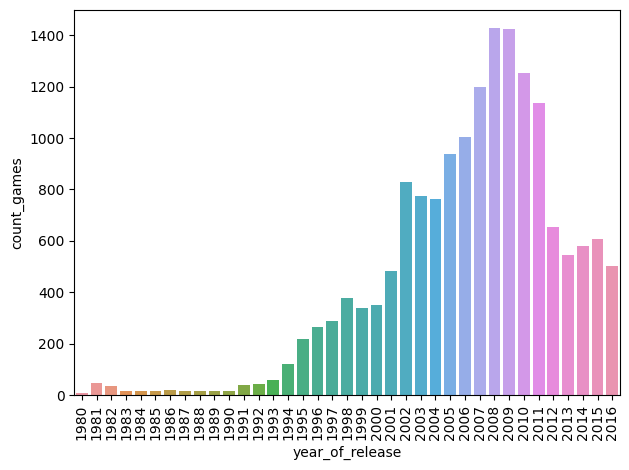

In [ ]:
games_x_year = data_games['year_of_release'].value_counts().sort_index().reset_index()
games_x_year.columns=['year_of_release','count_games']


sns.barplot(data=games_x_year,y='count_games',x='year_of_release')
plt.xticks(rotation=90)
plt.tight_layout()



*Del 2002 al 2011 se ve un aumento significativo en los juegos que fueron lanzados.
*de 1985 a 1993 los años con menos lanzamientos.

In [ ]:
data_games['ventas_totales'] =data_games['na_sales']+data_games['eu_sales']+data_games['jp_sales']
df_ventas_plataforma=data_games.groupby('platform')['ventas_totales'].count().sort_values(ascending=False).head(5)
df_ventas_plataforma


platform
ps2     2161
ds      2151
ps3     1331
wii     1320
x360    1262
Name: ventas_totales, dtype: int64

In [ ]:
data_games[data_games['name']=='lego marvel super heroes'].sort_values(by=['name', 'platform'])[['name', 'platform', 'ventas_totales']]

,name,platform,ventas_totales
2312,lego marvel super heroes,3ds,0.82
5053,lego marvel super heroes,ds,0.35
8368,lego marvel super heroes,pc,0.16
944,lego marvel super heroes,ps3,1.54
1138,lego marvel super heroes,ps4,1.36
3875,lego marvel super heroes,psv,0.40
2777,lego marvel super heroes,wiiu,0.68
729,lego marvel super heroes,x360,2.03
1958,lego marvel super heroes,xone,0.96


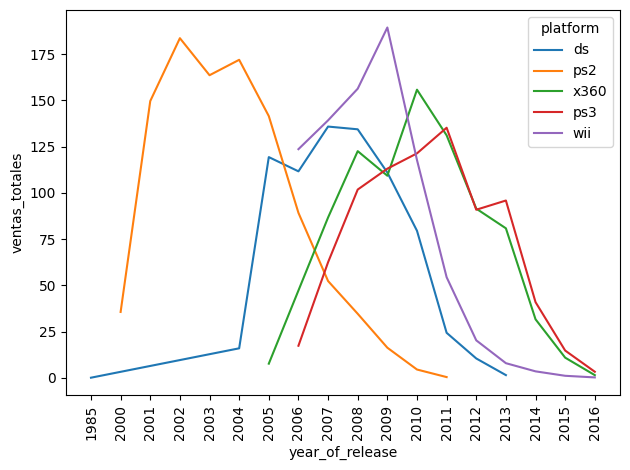

In [ ]:
top_platform = df_ventas_plataforma.index.to_list()
df_top_platform = data_games[data_games['platform'].isin(top_platform)]
df_top_platform = df_top_platform.dropna(subset=['year_of_release','ventas_totales'])
df_top_platform['year_of_release'] = df_top_platform['year_of_release'].astype(str)
# Agrupar por año y plataforma para el gráfico
df_grouped = df_top_platform.groupby(['year_of_release', 'platform'])['ventas_totales'].sum().reset_index()
sns.lineplot(data=df_grouped, x='year_of_release', y='ventas_totales', hue='platform')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

*Ps2Fue la plataforma con mayor pico de ventas (2002–2004).

*Aproximadamente tardan 11 años en desaparecer.

* Entre 2007 y 2011 el mercado alcanzó su mayor expansión

* Todas las plataformas grandes estuvieron vendiendo mucho al mismo tiempo.

* Después de 2012 todas las plataformas muestran declive


<div class="alert alert-block alert-success">
<b>Comentario de la revisora Iteración #1</b> <a class="tocSkip"></a>

Buen calculo de las ventas totales. Tu analisis sobre las ventas por plataformas y su evolucion temporal son buenas.

In [ ]:
data_filtred = data_games[(data_games['year_of_release'] >= 2007) & (data_games['year_of_release'] <= 2011)]
data_filtred

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tot_na_sales,tot_eu_sales,tot_jp_sales,ventas_totales
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,15.68,12.76,3.79,32.23
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8,e,15.61,10.93,3.28,29.82
8,new super mario bros. wii,wii,2009,platform,14.44,6.94,4.70,2.24,87.0,8.4,e,14.44,6.94,4.70,26.08
13,wii fit,wii,2007,sports,8.92,8.03,3.60,2.15,80.0,7.7,e,8.92,8.03,3.60,20.55
14,kinect adventures!,x360,2010,misc,15.00,4.89,0.24,1.69,61.0,6.3,e,15.00,4.89,0.24,20.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16699,eiyuu densetsu: sora no kiseki material collec...,psp,2007,role-playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.00,0.00,0.01,0.01
16700,storm: frontline nation,pc,2011,strategy,0.00,0.01,0.00,0.00,60.0,7.2,e10+,0.00,0.01,0.00,0.01
16702,plushees,ds,2008,simulation,0.01,0.00,0.00,0.00,NaN,tbd,e,0.01,0.00,0.00,0.01
16703,15 days,pc,2009,adventure,0.00,0.01,0.00,0.00,63.0,5.8,NaN,0.00,0.01,0.00,0.01


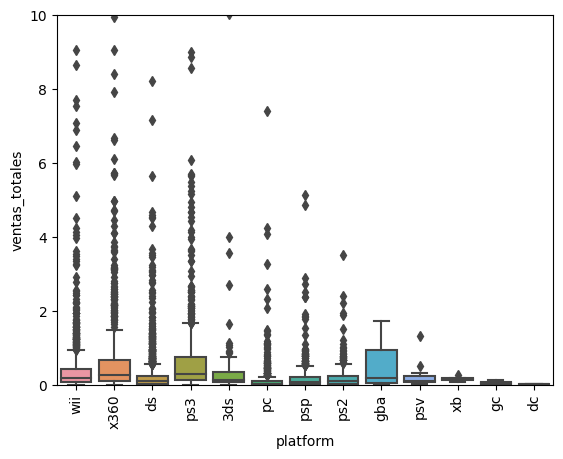

In [ ]:

sns.boxplot(data=data_filtred, x="platform", y="ventas_totales")
plt.xticks(rotation=90)
plt.ylim(0, 10)
plt.show()

Wii, X360, DS tienen las ventas más altas o distribuciones más fuertes. WII Y X360 Con juegos muy exitosos.
PS3 : ventas elevadas y mas consistentes
PC, PSP, PS2, 3DS: Ventas moderadas
GBA, PSV, XB, GC, DC: Estas plataformas, Tienen casi todas las cajas muy cerca de cero. bajo exito en la ventas.

In [ ]:
data_wii = data_filtred[data_filtred['platform'] == 'wii'].copy()
# Convertir a numérico (importante porque hay 'tbd')
data_wii['user_score'] = pd.to_numeric(data_wii['user_score'], errors='coerce')
data_wii['critic_score'] = pd.to_numeric(data_wii['critic_score'], errors='coerce')
# Quitar nulos
data_wii= data_wii.dropna(subset=['user_score', 'critic_score', 'ventas_totales'])

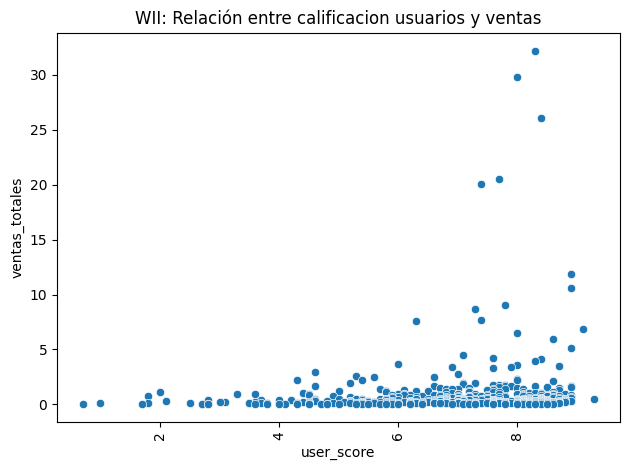

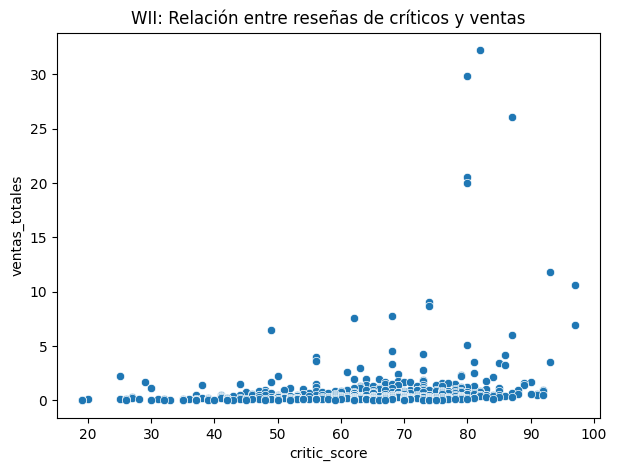

In [ ]:
sns.scatterplot(data=data_wii, x='user_score',y='ventas_totales')
plt.xticks(rotation=90)
# plt.xticks(ticks=range(0, 101, 10)) 
plt.title("WII: Relación entre calificacion usuarios y ventas")
plt.tight_layout()
plt.show()

plt.figure(figsize=(7,5))
sns.scatterplot(data=data_wii, x='critic_score', y='ventas_totales')
plt.title("WII: Relación entre reseñas de críticos y ventas")
plt.show()

1.Correlación ventas vs user_score: Los juegos con mejor calificación de usuarios tienden a vender ligeramente más, pero no es una condicion para vender mas.
2.La correlación entre critic_score y ventas: Es mayor la correlacion pero sigue siendo debil, es decir que no necesariamente influye para que un juego tenga mas ventas.

<div class="alert alert-block alert-danger">
<b>Comentario de la revisora Iteración #1</b> <a class="tocSkip"></a>

Hace falta seleccionar un rango de tiempo adecuado para el analisis. 

El grafico de cajas está correcto, solo te recomendaría poner limites en el eje Y que permitan observar mejor la distribucion por plataforma sin darle tanta importancia a los outliers.

Además, el analisis por correlacion de reseñas con ventas requiere tambien el calculo literal del coeficiente de correlacion y realizar tambien el analisis para las reseñas de criticos, no solo la de usuarios.

<div class="alert alert-block alert-success">
<b>Comentario de la revisora Iteración #2</b> <a class="tocSkip"></a>

Corregido, buen trabajo.



Identificar que los juegos que aparezcan en varias plataformas.

In [ ]:
platform_comunes=data_games.groupby('name')['platform'].nunique().sort_values(ascending=False)
top5_platform_comunes=platform_comunes[:5]
top5_platform_comunes.index

Index(['need for speed: most wanted', 'madden nfl 07',
       'lego marvel super heroes', 'ratatouille', 'fifa 14'],
      dtype='object', name='name')

In [ ]:
filtrado_platform=data_games[data_games['name'].isin(top5_platform_comunes.index)]
filtrado_platform.sort_values(by=['name', 'platform'])[['name', 'platform', 'ventas_totales']]
filtrado_pivot=filtrado_platform.pivot_table(index='name',columns='platform',values='ventas_totales',aggfunc='sum')
filtrado_pivot

platform,3ds,ds,gba,gc,pc,ps2,ps3,ps4,psp,psv,wii,wiiu,x360,xb,xone
name,,,,,,,,,,,,,,,
fifa 14,0.22,NaN,NaN,NaN,0.37,NaN,5.09,2.57,0.15,0.32,0.36,NaN,3.82,NaN,1.07
lego marvel super heroes,0.82,0.35,NaN,NaN,0.16,NaN,1.54,1.36,NaN,0.40,NaN,0.68,2.03,NaN,0.96
madden nfl 07,NaN,0.20,0.03,0.61,NaN,3.88,0.48,NaN,0.80,NaN,0.46,NaN,1.67,1.00,NaN
need for speed: most wanted,NaN,0.25,0.26,0.54,0.31,3.90,2.23,NaN,NaN,0.79,NaN,0.25,2.56,0.99,NaN
ratatouille,NaN,1.11,0.19,0.14,0.02,0.31,0.41,NaN,0.49,NaN,0.46,NaN,0.25,NaN,NaN


juegos por genero: action          3369
sports          2348
misc            1750
role-playing    1498
shooter         1323
adventure       1303
racing          1249
platform         888
simulation       873
fighting         849
strategy         683
puzzle           580
Name: genre, dtype: int64


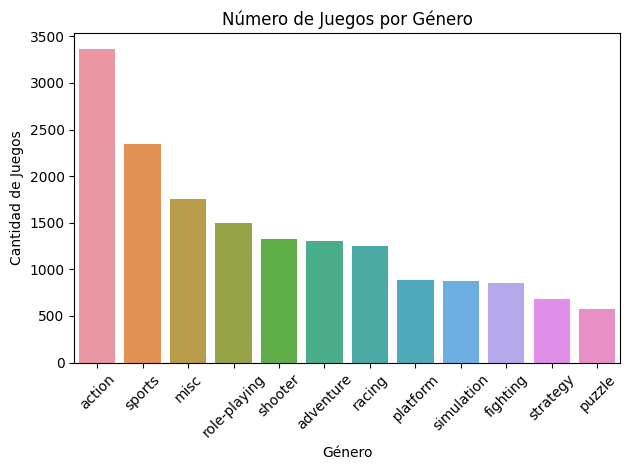

Ventas por genero: genre
action          1559.57
sports          1196.76
shooter          948.34
role-playing     874.93
platform         776.68
misc             728.12
racing           652.57
fighting         411.17
simulation       359.24
puzzle           230.19
adventure        221.10
strategy         163.38
Name: ventas_totales, dtype: float64


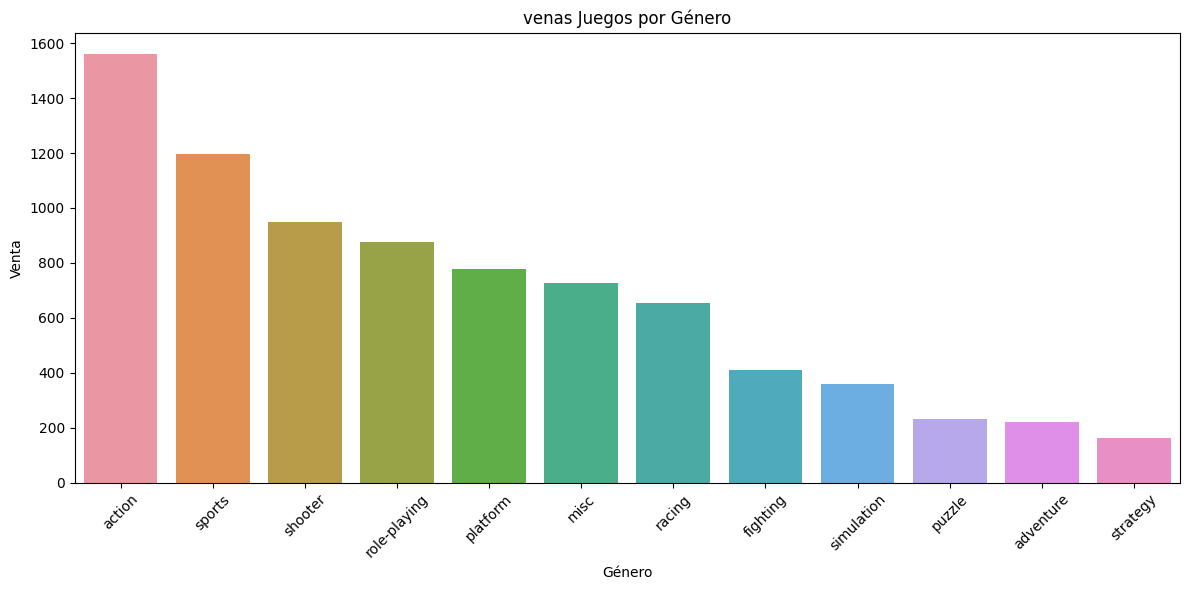

In [ ]:

games_genero=data_games['genre'].value_counts().sort_values(ascending=False)
print("juegos por genero:",games_genero)

sns.barplot(x=games_genero.index, y=games_genero.values)
plt.title('Número de Juegos por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad de Juegos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# 

renta_genre=data_games.groupby('genre')['ventas_totales'].sum().sort_values(ascending=False)
print("Ventas por genero:",renta_genre)


plt.figure(figsize=(12, 6))
sns.barplot(x=renta_genre.index, y=renta_genre.values)
plt.title('venas Juegos por Género')
plt.xlabel('Género')
plt.ylabel('Venta')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Los géneros más vendidos son los más masivos. (actio, sports, shooter)
Los géneros más comunes en las plataformas NO son necesariamente los que generan más ventas totales.
Las plataformas con más ventas no necesariamente tienen los géneros con más variedad, sino los géneros que venden más por título

En las 3 regiones la plataform mas vendida es ds siendo en la region NA con mas ventas.
2600: Muy exitosa en NA (103.94) pero casi inexistente en otras regiones
3DO: Prácticamente sin ventas, excepto una pequeña cantidad en

¿Qué representa cada clasificación?
AO (Adults Only): Solo adultos (18+)
E (Everyone): Para todos
E10+ (Everyone 10+): Para 10 años en adelante
EC (Early Childhood): Primera infancia
K-A (Kids to Adults): Clasificación antigua, ahora es "E"
M (Mature): Adultos (17+)
RP (Rating Pending): Clasificación pendiente
T (Teen): Adolescentes (13+)

In [ ]:
calsificaciones=[]
esrb_na = data_games.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
esrb_eu = data_games.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
esrb_jp = data_games.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
clasificaciones=pd.concat([esrb_na,esrb_eu,esrb_jp],axis=1)
clasificaciones

,na_sales,eu_sales,jp_sales
rating,,,
e,1292.99,710.25,198.11
t,759.75,427.03,151.40
m,748.48,483.97,64.24
e10+,353.32,188.52,40.20
k-a,2.56,0.27,1.46
ec,1.53,0.11,0.00
ao,1.26,0.61,0.00
rp,0.00,0.08,0.00


mayores ventas en clasificacion para todos y adolescentes.
Diferencias culturales importantes:
Juegos Mature (M):
- NA: 748.48 millones (muy alto)
- EU: 483.97 millones (alto también)
- JP: 64.24 millones (¡mucho más bajo!)

Juegos Teen (T):
- NA: 759.75 millones
- EU: 427.03 millones  
- JP: 151.40 millones

Norteamérica consume más contenido maduro que otras regiones
Japón prefiere contenido familiar y teen
Europa está en el medio entre NA y JP

In [ ]:
data_games = data_games.dropna(subset=['user_score'])
data_games['user_score'] = pd.to_numeric(data_games['user_score'], errors='coerce')

In [ ]:

score_xbox=data_games.query(
    "platform == 'xone' and user_score != 'tbd' and user_score.isna()==False "
)["user_score"]
score_pc=data_games.query(
    "platform == 'pc' and user_score != 'tbd' and user_score.isna()==False "
)["user_score"]
score_pc


85       7.6
138      7.3
192      4.0
218      8.2
284      9.1
        ... 
16679    8.1
16690    7.6
16694    5.8
16700    7.2
16703    5.8
Name: user_score, Length: 770, dtype: float64

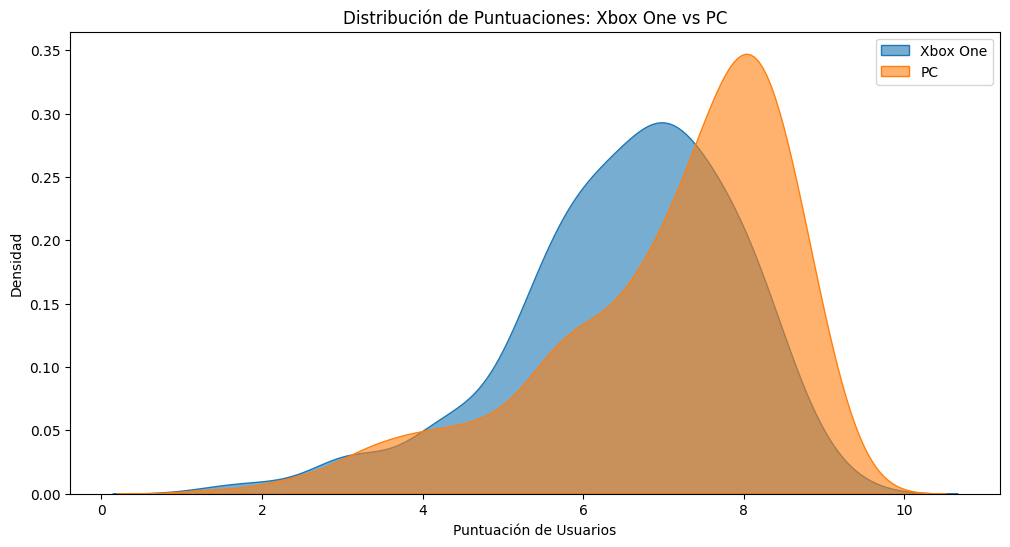

In [ ]:


plt.figure(figsize=(12, 6))
sns.kdeplot(score_xbox, label='Xbox One', fill=True, alpha=0.6)
sns.kdeplot(score_pc, label='PC', fill=True, alpha=0.6)
plt.xlabel('Puntuación de Usuarios')
plt.ylabel('Densidad')
plt.title('Distribución de Puntuaciones: Xbox One vs PC')
plt.legend()
plt.show()



In [ ]:
✔️ Conclusión general

La curva PC tiene puntuaciones de usuarios ligeramente más altas y concentradas alrededor de 7–8, mientras que X-box se concentra más en el rango 6–7 y presenta mayor variabilidad. Esto sugiere que el segundo grupo recibe valoraciones más uniformes y un poco mejores por parte de los usuarios.

✔️ Variabilidad

El grupo azul muestra puntuaciones más dispersas, lo que indica que los juegos de ese grupo generan opiniones más divididas.

✔️ Calidad percibida

El grupo naranja parece percibirse ligeramente mejor, ya que su distribución se desplaza hacia puntuaciones más altas.

<div class="alert alert-block alert-warning"> 
<b>Comentario de la revisora Iteración #1</b> <a class="tocSkip"></a>

Vas muy bien con el analisis por regiones. Pero de nuevo a este analisis le hace falta graficos que respalden tu trabajo y conclusiones que acompañen tus resultados.

In [ ]:
stat, p = stats.ttest_ind(score_xbox, score_pc)
print(f'Estadístico t: {stat:.2f}')
print(f'Valor p: {p:.4f}')

if p < 0.05:
    print("Rechazamos la hipótesis nula: hay diferencia significativa.")
else:
    print("No se rechaza la hipótesis nula: no hay diferencia significativa.")




Estadístico t: -4.37
Valor p: 0.0000
Rechazamos la hipótesis nula: hay diferencia significativa.


In [ ]:
user_action_mean=data_games.query(
    "genre == 'action' and user_score.isna()==False "
)["user_score"]
user_sports_mean=data_games.query(
    "genre == 'sports' and user_score.isna()==False"
)["user_score"]

In [ ]:
stat, p = stats.ttest_ind(score_xbox, score_pc)
print(f'Estadístico t: {stat:.2f}')
print(f'Valor p: {p:.4f}')

if p < 0.05:
    print("Rechazamos la hipótesis nula: hay diferencia significativa.")
else:
    print("No se rechaza la hipótesis nula: no hay diferencia significativa.")

Estadístico t: -4.37
Valor p: 0.0000
Rechazamos la hipótesis nula: hay diferencia significativa.


Formular así las hipótesis es el estándar para comparar dos medias. La hipótesis nula representa la ausencia de diferencia y la alternativa representa el efecto que se busca confirmar.


<div class="alert alert-block alert-danger"> 
<b>Comentario de la revisora Iteración #1</b> <a class="tocSkip"></a>

Hace falta complementar con las conclusiones detalladas sobre lo que has obtenido en el proyecto. 

CONCLUSIONES:

El período de mayor crecimiento fue del 2002 al 2011, con un pico entre 2007-2011
Las plataformas tienen un ciclo de vida promedio de 11 años antes de desaparecer
Después de 2012, todas las plataformas muestran declive

2. Análisis por Plataformas

Líderes en cantidad de juegos: PS2 (2,161), DS (2,151), PS3 (1,331)
Líderes en ventas: Wii, X360 y DS mostraron las distribuciones más altas
PS2 tuvo el mayor pico de ventas (2002-2004)
la cantidad de juegos no garantiza mayores ventas; la calidad y el marketing son factores clave.

3. Análisis por Géneros

Más populares por cantidad: Action (3,369), Sports (2,348), Misc (1,750)
Más rentables por ventas: Action (1,559.57M), Sports (1,196.76M), Shooter (948.34M)
Los géneros masivos (Action, Sports, Shooter) dominan tanto en cantidad como en ingresos
Los géneros de acción y deportes son los más seguros comercialmente.

4. Análisis por Regiones

Norteamérica: Consume más contenido maduro (M: 748.48M vs JP: 64.24M)
Japón: Prefiere contenido familiar y teen
Europa: Posición intermedia entre NA y JP
Clasificación E (Everyone): Líder mundial con 1,292.99M en NA
Existen diferencias culturales significativas que deben considerarse en estrategias de marketing regional.

5. Correlación entre Reseñas y Ventas

La correlación entre puntuaciones de usuarios/críticos y ventas es débil
Las buenas reseñas no garantizan altas ventas
Otros factores (marketing, franquicia, timing) son más determinantes
La calidad percibida es importante pero no es el único factor de éxito comercial.

6. Pruebas de Hipótesis

Xbox One vs PC: Diferencia significativa en puntuaciones de usuarios (p < 0.05)
PC recibe puntuaciones ligeramente más altas y concentradas (7-8)
Xbox One muestra mayor variabilidad en puntuaciones (6-7)
Las plataformas influyen en la percepción de calidad de los juegos.

<div class="alert alert-block alert-success">
<b>Comentario de la revisora Iteración #2</b> <a class="tocSkip"></a>


Buen trabajo con las conclusiones proporcionadas frente al proyecto, van muy bien encaminadas en todos los puntos realizados a acciones de negocio.